In [57]:
import sys

from os.path import basename
from typing import Dict, Callable

from pathlib import Path
import pickle

import pandas as pd

from collections import namedtuple

%matplotlib inline

In [58]:
sys.path.append('/home/laugustyniak/github/phd/sentiment-backend/')
from aspects.analysis.nlp_architect import get_metrics

In [106]:
models_info_path = Path('../models/sota-sswe-50/')

In [107]:
models_info_path.absolute()

PosixPath('/home/laugustyniak/github/phd/nlp-architect/examples/aspect_extraction/notebooks/../models/sota-sswe-50')

In [108]:
models_paths = list(models_info_path.glob('*'))

In [109]:
models_paths[:2]

[PosixPath('../models/sota-sswe-50/model-info-char-word-bilstm-crf-25epochs-laptops-train.conll.info'),
 PosixPath('../models/sota-sswe-50/model-info-word-bilstm-crf-25epochs-laptops-train.conll.info')]

In [110]:
models_metrics = get_metrics(models_paths, lambda d: '25epoch' in d.as_posix())

In [111]:
for model_name, model_metrics in models_metrics.items():
    print(model_name, model_metrics.f1)

model-info-char-word-bilstm-crf-25epochs-laptops-train.conll 60.76388888888889
model-info-word-bilstm-crf-25epochs-laptops-train.conll 57.688808007279334
model-info-char-word-bilstm-crf-25epochs-restaurants-train.conll 75.3931544865865
model-info-word-bilstm-crf-25epochs-restaurants-train.conll 69.81677917068467


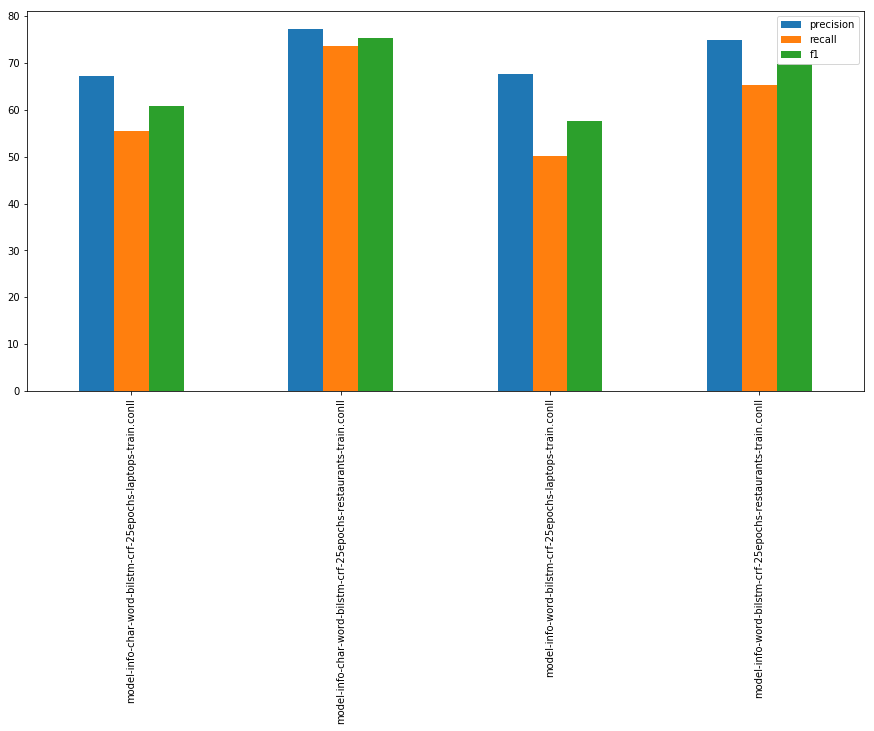

In [112]:
pd.DataFrame.from_dict(models_metrics, orient='index').sort_index(axis=0).plot(kind='bar', figsize=(15,7))